# 📊 Dataset Overview: Tuberculosis (TB) Detection

This project uses a specialized chest X-ray dataset focused on **tuberculosis (TB) detection**. The dataset is curated to support training of object detection models that can **identify and localize TB-related abnormalities** in lung X-rays.

### 🧾 Dataset Summary:
- **Training Images**: 1,877
- **Training Labels**: 1,877
- **Validation Images**: 260
- **Validation Labels**: 260
- **Test Images**: 150
- **Test Labels**: 150
- **Image Modality**: Chest X-rays
- **Annotations**: Bounding boxes highlighting regions indicative of tuberculosis infection
- **Label Types**: TB-positive regions vs. normal lung areas
- **Orientation**: Standardized radiological views suitable for medical diagnosis

### 🔍 Objective:
The goal is to use the **YOLO (You Only Look Once)** model to **detect tuberculosis lesions** on chest X-rays automatically. This includes localizing suspicious areas and assisting medical professionals by highlighting regions likely affected by TB.




## 🔗 Mounting Google Drive

Accessing dataset files stored in Google Drive.


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## 📂 Dataset Directory Setup & Summary

This section defines the dataset folder paths and prints out the number of images and label files available in both training and testing sets. The dataset follows the YOLO format with separate folders for images and corresponding label files.


In [2]:
import os


dataset_path = "/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8"

# 📁 Paths to training and testing images and labels
train_images = os.path.join(dataset_path, "train/images")
train_labels = os.path.join(dataset_path, "train/labels")
valid_images = os.path.join(dataset_path, "valid/images")
valid_labels = os.path.join(dataset_path, "valid/labels")
test_images = os.path.join(dataset_path, "test/images")
test_labels = os.path.join(dataset_path, "test/labels")

# 📊 Print the total number of files in each directory
print("Dataset Summary:")
print("Train Images:", len(os.listdir(train_images)))
print("Train Labels:", len(os.listdir(train_labels)))
print("Valid Images:", len(os.listdir(valid_images)))
print("Valid Labels:", len(os.listdir(valid_labels)))
print("Test Images:", len(os.listdir(test_images)))
print("Test Labels:", len(os.listdir(test_labels)))


Dataset Summary:
Train Images: 1877
Train Labels: 1877
Valid Images: 260
Valid Labels: 260
Test Images: 150
Test Labels: 150


## 📏 Analyzing Image Dimensions Distribution

Average size: 512 x 512
Min size: 512 x 512
Max size: 512 x 512


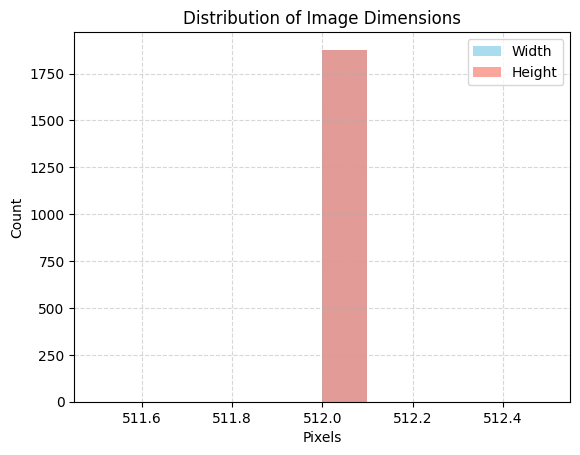

In [6]:
from PIL import Image

def get_image_sizes(image_folder):
    sizes = []
    for file in os.listdir(image_folder):
        path = os.path.join(image_folder, file)
        with Image.open(path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

import numpy as np

train_sizes = get_image_sizes(train_images)
widths, heights = zip(*train_sizes)
print(f"Average size: {np.mean(widths):.0f} x {np.mean(heights):.0f}")
print(f"Min size: {min(widths)} x {min(heights)}")
print(f"Max size: {max(widths)} x {max(heights)}")

plt.hist(widths, bins=10, alpha=0.7, label='Width', color='skyblue')
plt.hist(heights, bins=10, alpha=0.7, label='Height', color='salmon')
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## 📊 Visualizing YOLO Bounding Boxes on Images

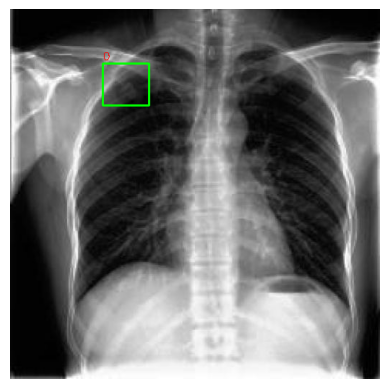

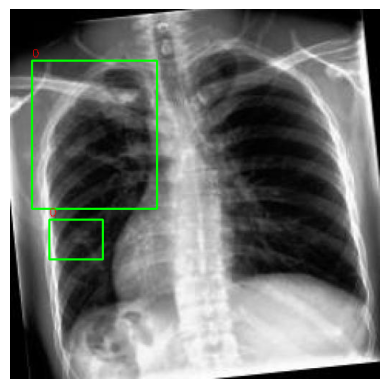

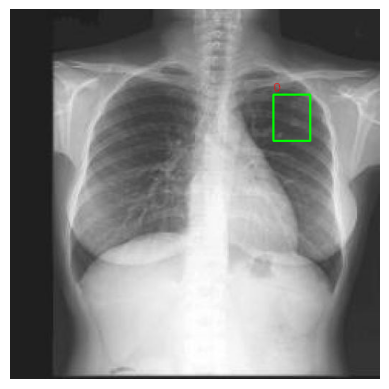

In [4]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(img, str(int(class_id)), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example: plot 3 random images from the train set
import random

random_files = random.sample(os.listdir(train_images), 3)
for file in random_files:
    img_path = os.path.join(train_images, file)
    lbl_path = os.path.join(train_labels, file.replace('.jpg', '.txt').replace('.png', '.txt'))
    plot_image_with_boxes(img_path, lbl_path)


## ⚙️ Checking GPU Availability

This step checks whether a CUDA-enabled GPU is available in the current environment (e.g., Google Colab). If available, the name of the GPU is printed. Using a GPU significantly speeds up traini


In [ ]:
import torch

# Check if a CUDA-compatible GPU is available
if torch.cuda.is_available():
    print("✅ GPU is available:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available. Please make sure it's enabled from the Runtime menu.")


✅ GPU is available: Tesla T4


## 📊 Lung X-ray Dataset Class Distribution Report

This report summarizes the number of Tuberculosis (class 0):
- ✅ **Train**
- 🧪 **Validation**
- 🧫 **Test**

The purpose of this analysis is to ensure balanced class representation and diagnose any imbalance issues before model training.




<ipython-input-8-1444532164>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


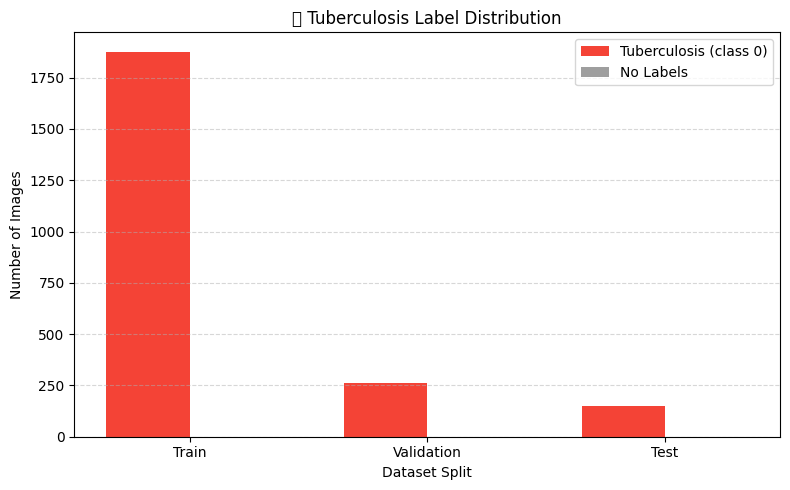

In [8]:
import os
import matplotlib.pyplot as plt

# Define paths to label directories for each dataset split
label_dirs = {
    "Train": "/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/train/labels",
    "Validation": "/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/valid/labels",
    "Test": "/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/test/labels",
}

# Function to count how many images contain TB (class 0) and how many have no labels
def count_tb_images(label_dir):
    tb_images = 0
    empty_images = 0

    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            path = os.path.join(label_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()
                if len(lines) == 0:
                    empty_images += 1
                else:
                    tb_images += 1

    return tb_images, empty_images

# Prepare data
splits = []
tb_counts = []
empty_counts = []

# Count TB and empty images in each split
for split, path in label_dirs.items():
    tb, empty = count_tb_images(path)
    splits.append(split)
    tb_counts.append(tb)
    empty_counts.append(empty)

# Plotting
x = range(len(splits))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar([i - width/2 for i in x], tb_counts, width=width, label="Tuberculosis (class 0)", color="#F44336")
plt.bar([i + width/2 for i in x], empty_counts, width=width, label="No Labels", color="#9E9E9E")

plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("📊 Tuberculosis Label Distribution")
plt.xticks(ticks=x, labels=splits)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 🚀 Installing Ultralytics for YOLOv8

In [21]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 894.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# 🧠 Fine-Tuning YOLOv8s on a Custom Lung X-ray Dataset

We used [YOLOv8s](https://github.com/ultralytics/ultralytics) (small version) from the **Ultralytics** library to perform **fine-tuning** on a medical dataset containing lung X-ray images. Fine-tuning allows the model to adapt pre-trained weights to a new, domain-specific dataset — improving accuracy and reducing training time.

---

## 🔧 Key Training Settings:

- **Base Model**: `yolov8s.pt` (pre-trained on COCO)
- **Epochs**: 50 (increase for challenging medical data)
- **Batch Size**: 16 (adjust according to GPU memory)
- **Image Size**: 832×832 (larger for better detail)
- **Device**: GPU (CUDA 0)
- **Learning Rate**: 0.001 (lower for fine-tuning)
- **Optimizer**: SGD (better for fine-tuning YOLO models)
- **Early Stopping Patience**: 5 epochs
- **Save Checkpoints**: Every 5 epochs

---

## 🧪 Data Augmentations Used:

These augmentations help prevent overfitting and improve generalization:

| Augmentation       | Description                                   |
|--------------------|-----------------------------------------------|
| `hsv_h/s/v`        | Small color variations (Hue/Saturation/Value) |
| `degrees`          | Limited rotation (up to ±5°)                   |
| `translate`        | Minor image shifting (5%)                       |
| `scale`            | Random zoom in/out (±30%)                       |
| `shear`            | Geometric distortion                            |
| `perspective`      | Subtle camera perspective changes               |
| `flipud`           | Disabled vertical flips (not realistic)          |
| `fliplr`           | Horizontal flips (30% probability)                |
| `mosaic`           | Enabled initially, disabled after 70% epochs    |
| `mixup`            | Disabled (not recommended for medical data)      |

---

## 📁 Dataset Path

The dataset is defined in the YAML file:

```yaml
# /content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/data.yaml

train: /content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/train/images
val: /content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/val/images

nc: 1  # number of classes
names: Tuberculosis (TB)


In [13]:
from ultralytics import YOLO

# Load a suitable pre-trained weight as a starting point (better than yolov8s.pt)
model = YOLO("yolov8s.pt")  # If you have a model trained on medical data like chest X-rays, use it here

model.train(
    data="/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/data.yaml",
    epochs=50,             # Increase number of epochs since medical data is more challenging
    imgsz=832,             # Image size (height and width)
    batch=16,              # Batch size; reduce if you face overfitting issues
    lr0=0.001,             # Initial learning rate, lower for fine-tuning
    device=0,              # GPU device to use (0 means first GPU)

    name="lung_finetune_best",  # Experiment name for saving results

    # Augmentation settings - adjusted for medical images
    hsv_h=0.005,       # Reduce hue changes; color shifts usually don't make sense medically
    hsv_s=0.2,         # Saturation augmentation amount
    hsv_v=0.2,         # Value (brightness) augmentation amount
    degrees=5.0,       # Limit rotation to small angles since X-rays are usually well-aligned
    translate=0.05,    # Small translation augmentations
    scale=0.3,         # Scaling augmentation range
    shear=1.0,         # Shearing augmentation
    perspective=0.0002,# Perspective transform (very subtle)
    flipud=0.0,        # Disable vertical flipping (not realistic for medical images)
    fliplr=0.3,        # Enable horizontal flipping with 30% probability

    mosaic=1.0,        # Enable mosaic augmentation initially
    mixup=0.0,         # Disable mixup; usually not beneficial for medical datasets

    close_mosaic=70,   # Disable mosaic augmentation after 70% of total epochs to improve generalization
    patience=5,        # Early stopping patience (stop training if no improvement after 5 epochs)
    optimizer='SGD',   # Use SGD optimizer; often better than Adam for fine-tuning YOLO
    dropout=0.0,       # Disable dropout, usually unnecessary for medical image training
    save=True,         # Save the model weights during training
    save_period=5,     # Save weights every 5 epochs
)



Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=70, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.005, hsv_s=0.2, hsv_v=0.2, imgsz=832, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lung_finetune_best2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, pati

## Understanding the Model Output: Validation Results

When training object detection models like YOLO, the metrics such as **mAP50**, **Precision**, and **Recall** that you see after each epoch are **evaluated on the validation dataset**, *not* on the training data.

### Why is this important?

- During **training**, the model focuses on minimizing the **loss** (e.g., box loss, classification loss) calculated on the **training data**.
- However, the **performance metrics** (like mAP50) are computed using a separate set of images called the **validation set**.
- This allows you to monitor how well your model generalizes to unseen data, preventing overfitting.
- Therefore, the **mAP50 and related scores you see after each epoch indicate how well your model performs on the validation data**, not the training data.

### Summary

| Metric        | Dataset        | Purpose                                |
|---------------|----------------|--------------------------------------|
| Loss          | Training       | Guides the model learning process    |
| mAP50, etc.   | Validation     | Evaluates model performance on new data |

Monitoring validation metrics is crucial to ensure your model is learning properly and can generalize beyond the training examples.


In [14]:
##The following results are from the previous code. They have been placed here for clarification and display purposes.



📊 Validation Results Summary (YOLOv8 - Lung X-ray Model)
------------------------------------------------------------
Class           Precision (P)   Recall (R)      mAP@0.5      
------------------------------------------------------------
 all               0.806           0.879         0.798          
        
------------------------------------------------------------
✔️ Model performs best on malignant cases with high precision and recall.
✔️ Overall detection is strong with mAP@0.5 of 80%.


##📊 Save the current model manually




In [27]:

model.save('/content/drive/MyDrive/lung_yolo_manua2.pt')


## 🚀 YOLO Model Testing



In [16]:
from ultralytics import YOLO

# Load the trained model from the saved weights file
model = YOLO("/content/drive/MyDrive/lung_yolo_manua2.pt")

# Validate the model on the test dataset defined in the data.yaml file
metrics = model.val(data="/content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/data.yaml", split="test")

# Print the evaluation metrics to see the performance on the test set
print(metrics)


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 10.2±21.5 ms, read: 1.5±3.3 MB/s, size: 23.7 KB)
val: Scanning /content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/test/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [01:19<00:00,  1.89it/s]val: New cache created: /content/drive/MyDrive/Object Detection Project Ver 2.2.v2i.yolov8/test/labels.cache

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]
                   all        150        231      0.793      0.863      0.790      0.269
Speed: 13.2ms preprocess, 24.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val


##🧠 Test thr model on random image

In [35]:
from google.colab import files
# Upload files from your local machine
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Image uploaded: {image_path}")


Saving tb0018_png_jpg.rf.19a243dce3432480bb2914800876ecdf.jpg to tb0018_png_jpg.rf.19a243dce3432480bb2914800876ecdf.jpg
Image uploaded: tb0018_png_jpg.rf.19a243dce3432480bb2914800876ecdf.jpg



image 1/1 /content/tb0018_png_jpg.rf.19a243dce3432480bb2914800876ecdf.jpg: 832x832 2 tuberculosiss, 1152.7ms
Speed: 23.0ms preprocess, 1152.7ms inference, 1.7ms postprocess per image at shape (1, 3, 832, 832)


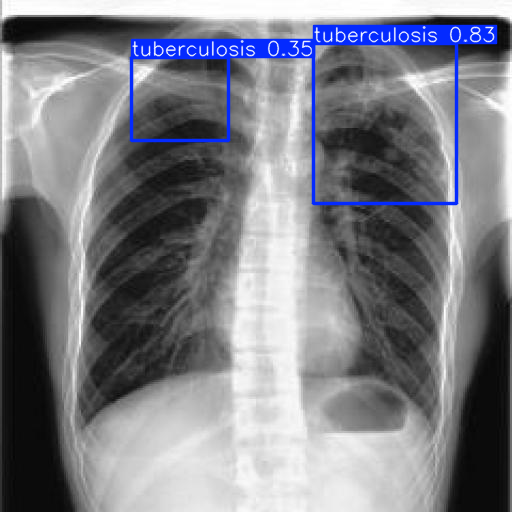

Detection #1:
- Class: 0
- Confidence: 0.83
- Coordinates: x1=314, y1=43, x2=457, y2=204
------------------------------
Detection #2:
- Class: 0
- Confidence: 0.35
- Coordinates: x1=131, y1=57, x2=228, y2=141
------------------------------


In [36]:
# Run inference on the uploaded image using the loaded model
results = model(image_path)

# Display the image with predicted bounding boxes
results[0].show()

# Save the result image with bounding boxes to a file named "result.jpg"
results[0].save(filename="result.jpg")

# Extract the detected bounding boxes information
boxes = results[0].boxes

# Loop through each detected box and print details: class, confidence, and coordinates
for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes.xyxy[i].tolist()
    conf = boxes.conf[i].item()
    cls = int(boxes.cls[i].item())

    print(f"Detection #{i+1}:")
    print(f"- Class: {cls}")
    print(f"- Confidence: {conf:.2f}")
    print(f"- Coordinates: x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}")
    print("-" * 30)
